In [2]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook
from scipy.spatial.distance import cdist
import imageio
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

plt.style.use("seaborn-dark")

import sys
sys.path.append("../")
from rl.agents.q_agent import QAgent

In [3]:
a = np.loadtxt('test.csv', delimiter=",")

In [9]:
#Separate x axis and curve pts 
def ptseparator(array):
    xaxis = list(list())
    curve = list(list())
    for i in array:
        if i[1]==0:
            xaxis.append(i)
        else:
            curve.append(i)
    return xaxis, curve  

def slope_func(point, x):
    if (point[1]-x[1]) ==0:
        s = +100
    elif (point[1]!=0) and (x[1]!=0):
        s = +100
    else: 
        s = (point[0]-x[0])/(point[1]-x[1])
    return s
    
xaxis, curve = np.array(ptseparator(a))
xaxis = xaxis[:len(xaxis)-1]
print("xaxis array = \n", xaxis)
print("curve array = \n", curve)

xaxis array = 
 [[ 6.00383107  0.        ]
 [ 3.35733921  0.        ]
 [-4.35714012  0.        ]]
curve array = 
 [[ 5.16601049  5.16601049]
 [ 6.74624857  4.57775407]
 [-1.05853617  5.96498441]
 [-6.86150897  4.52874046]]


In [12]:
mat =  np.zeros((len(xaxis), len(curve)))
for i in range(len(xaxis)):
    for j in range(len(curve)):
        for z in range(len(curve)):
            a = slope_func(curve[j], xaxis[i])-slope_func(curve[z],xaxis[i])
            mat[]
            

0.0
-0.32435883846203306
1.0217913601016198
2.6786413689435395
0.32435883846203306
0.0
1.3461501985636528
3.003000207405573
-1.0217913601016198
-1.3461501985636528
0.0
1.6568500088419198
-2.6786413689435395
-3.003000207405573
-1.6568500088419198
0.0
0.0
-0.3901896933958329
1.0904094415893004
2.606553640266889
0.3901896933958329
0.0
1.4805991349851335
2.996743333662722
-1.0904094415893004
-1.4805991349851335
0.0
1.5161441986775888
-2.606553640266889
-2.996743333662722
-1.5161441986775888
0.0
0.0
-0.5820855297754597
1.2904299965568045
2.396419122022758
0.5820855297754597
0.0
1.8725155263322641
2.9785046517982177
-1.2904299965568045
-1.8725155263322641
0.0
1.1059891254659535
-2.396419122022758
-2.9785046517982177
-1.1059891254659535
0.0


In [3]:
class Environment(object):
    
    def __init__(self, n_stops=8,method="angle_difference", **kwargs):
        
        print(f"Initialized Delivery Environment with {n_stops} random stops")
        print(f"Target metric for optimization is {method}")
              
        #Initializaiton 
        self.n_stops = n_stops
        self.action_space = self.n_stops
        self.observation_space = self.n_stops
        self.stops = []
        self.method = method
        
        
        #Generate Stops 
        self._generate_stops()
        self._generate_q_values()
        self.render
        self.reset()
        
        
    def _generate_stops(self):
        
        xy = np.loadtxt('test.csv', delimiter=",")
        self.x = xy[:,0]
        self.y = xy[:,1]
        
    def _generate_q_values(self):
        xy = np.column_stack([self.x,self.y])
        mat =  np.zeros((len(xy), len(xy)))
        for i in range(len(xy)):
            for j in range(len(xy)):
                if (xy[j][1]-xy[i][1]) ==0:
                    mat[i][j] = -100
                elif (xy[j][1]!=0) and (xy[i][1]!=0):
                    mat[i][j] = -100
                else: 
                    mat[i][j] = (xy[j][0]-xy[i][0])/(xy[j][1]-xy[i][1])
        self.q_stops = mat
        
    def render(self,return_img = False):
        
        fig = plt.figure(figsize=(7,7))
        ax = fig.add_subplot(111)
        ax.set_title("Paths")

        # Show stops
        ax.scatter(self.x,self.y,c = "red",s = 50)

        # Show START
        if len(self.stops)>0:
            xy = self._get_xy(initial = True)
            xytext = xy[0]+0.1,xy[1]-0.05
            ax.annotate("START",xy=xy,xytext=xytext,weight = "bold")

        # Show itinerary
        if len(self.stops) > 1:
            ax.plot(self.x[self.stops],self.y[self.stops],c = "blue",linewidth=1,linestyle="--")
            
            # Annotate END
            xy = self._get_xy(initial = False)
            xytext = xy[0]+0.1,xy[1]-0.05
            ax.annotate("END",xy=xy,xytext=xytext,weight = "bold")

        plt.xticks([])
        plt.yticks([])
        
        if return_img:
            # From https://ndres.me/post/matplotlib-animated-gifs-easily/
            fig.canvas.draw_idle()
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close()
            return image
        else:
            plt.show()
    
    def reset(self):

        # Stops placeholder
        self.stops = [7]

        # Random first stop
        return self.stops[-1]

    def step(self,destination):

        # Get current state
        state = self._get_state()
        new_state = destination

        # Get reward for such a move
        reward = self._get_reward(state,new_state)

        # Append new_state to stops
        self.stops.append(destination)
        done = len(self.stops) == self.n_stops

        return new_state,reward,done

    def _get_state(self):
        return self.stops[-1]


    def _get_xy(self,initial = False):
        state = self.stops[0] if initial else self._get_state()
        x = self.x[state]
        y = self.y[state]
        return x,y


    def _get_reward(self,state,new_state):
        base_reward = self.q_stops[state,new_state]
        return base_reward

def run_episode(env,agent,verbose = 1):

    s = env.reset()
    agent.reset_memory()

    max_step = env.n_stops
    
    episode_reward = 0
    
    i = 0
    while i < max_step:

        # Remember the states
        agent.remember_state(s)

        # Choose an action
        a = agent.act(s)
        
        # Take the action, and get the reward from environment
        s_next,r,done = env.step(a)

        # Tweak the reward
        r = r
        
        if verbose: print(s_next,r,done)
        
        # Update our knowledge in the Q-table
        agent.train(s,a,r,s_next)
        
        # Update the caches
        episode_reward += r
        s = s_next
        
        # If the episode is terminated
        i += 1
        if done:
            break
            
    return env,agent,episode_reward



class DeliveryQAgent(QAgent):

    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.reset_memory()

    def act(self,s):

        # Get Q Vector
        q = np.copy(self.Q[s,:])

        # Avoid already visited states
        q[self.states_memory] = -np.inf

        if np.random.rand() > self.epsilon:
            a = np.argmax(q)
        else:
            a = np.random.choice([x for x in range(self.actions_size) if x not in self.states_memory])

        return a


    def remember_state(self,s):
        self.states_memory.append(s)

    def reset_memory(self):
        self.states_memory = []



def run_n_episodes(env,agent,name="training.gif", name2 = "low_reward.gif",n_episodes=1000,render_each=5,fps=10):

    # Store the rewards
    rewards = []
    imgs = []
    imgs2 = []

    # Experience replay
    for i in tqdm_notebook(range(n_episodes)):

        # Run the episode
        env,agent,episode_reward = run_episode(env,agent,verbose = 0)
        rewards.append(episode_reward)
            
        if i % render_each == 0:
            img = env.render(return_img = True)
            imgs.append(img)
    
        if episode_reward>-10:
            img = env.render(return_img = True)
            imgs2.append(img)
    
    
    
    # Show rewards
    plt.figure(figsize = (15,3))
    plt.title("Rewards over training")
    plt.plot(rewards)
    plt.show()

    # Save imgs as gif
    imageio.mimsave(name,imgs,fps = fps)
    imageio.mimsave(name2,imgs2,fps = fps)

    return env,agent

In [4]:
env = Environment()
print(env.q_stops)

Initialized Delivery Environment with 8 random stops
Target metric for optimization is angle_difference
[[-100.           -0.16217942 -100.            0.35010987 -100.
     1.84342456 -100.            1.        ]
 [  -0.16217942 -100.            0.16217942 -100.           -1.18397078
  -100.           -2.84082079 -100.        ]
 [-100.            0.16217942 -100.            0.74029957 -100.
     2.42551009 -100.            1.47370271]
 [   0.35010987 -100.            0.74029957 -100.           -0.74029957
  -100.           -2.25644377 -100.        ]
 [-100.           -1.18397078 -100.           -0.74029957 -100.
     0.55299456 -100.           -0.17745833]
 [   1.84342456 -100.            2.42551009 -100.            0.55299456
  -100.           -0.55299456 -100.        ]
 [-100.           -2.84082079 -100.           -2.25644377 -100.
    -0.55299456 -100.           -1.51510316]
 [   1.         -100.            1.47370271 -100.           -0.17745833
  -100.           -1.51510316 -100.  

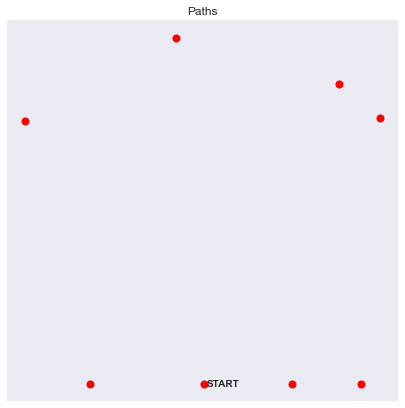

In [5]:
env.render()

In [6]:
env.stops

[7]

In [7]:
for i in [7,2]:
    env.step(i)

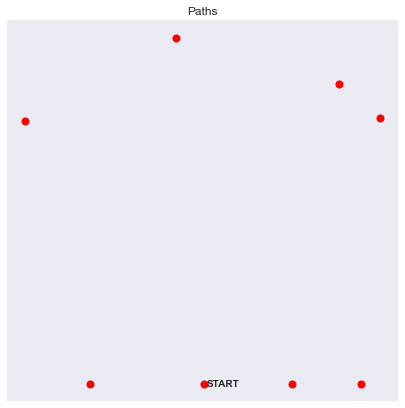

In [8]:
env.reset()
env.render()

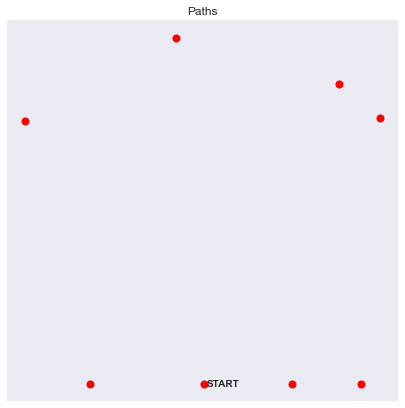

In [9]:
env.render()

In [10]:
env = Environment(n_stops = 8,method = "angle_difference" )

Initialized Delivery Environment with 8 random stops
Target metric for optimization is angle_difference


In [11]:
agent = DeliveryQAgent(env.observation_space,env.action_space)

C:\Users\PC\AppData\Local\Temp/ipykernel_8788/2327013145.py:197: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n_episodes)):


  0%|          | 0/1000 [00:00<?, ?it/s]

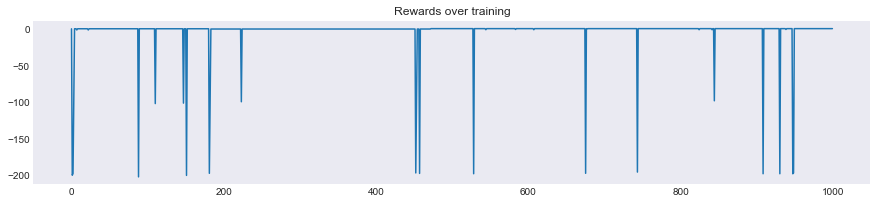

(<__main__.Environment at 0x1d71b09b490>,
 <__main__.DeliveryQAgent at 0x1d71b09bcd0>)

In [12]:
run_n_episodes(env,agent,"training_8_pts.gif", "low_reward_8.gif")

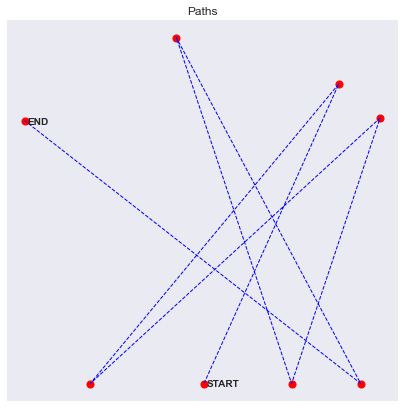

In [13]:
env.render()

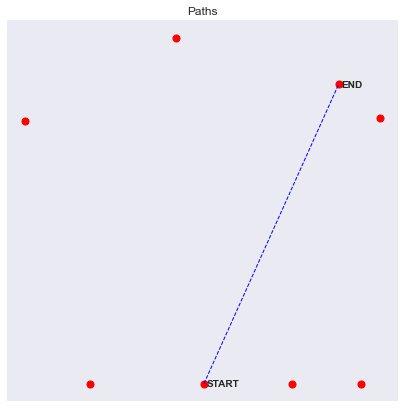

In [14]:
env.reset()
for i in [0]:
    env.step(i)
env.render()

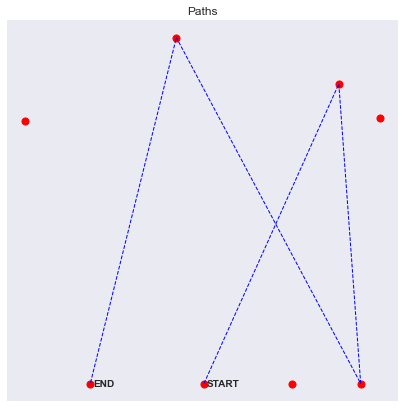

In [15]:
env.reset()
for i in [0]:
    env.step(i)
for i in[1, 4, 5]:
    env.step(i)
env.render()